# Experimento 1: Modelo KNN

### Import das dependências

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Dataset

Leitura do dataset, já pré-processado e normalizado

In [2]:
train_data = pd.read_csv('./data/train_normalized_dataset.csv')
test_data = pd.read_csv('./data/test_normalized_dataset.csv')

In [3]:
train_data.head(10)

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,0.261743
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,0.228380
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,0.285777
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,0.581431
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,0.143584
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,False,rssi_1_1,0.528973
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,False,rssi_1_1,0.776637
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,True,rssi_1_1,0.370544
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,True,rssi_1_1,0.013828
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,True,rssi_1_1,0.324846


In [4]:
test_data.head(10)

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,0,5.0,3.0,2.0,rssi_1_1,0.0
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,3,5.0,3.0,2.0,rssi_1_1,0.0
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,8,5.0,3.0,2.0,rssi_1_1,0.0
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,10,5.0,3.0,2.0,rssi_1_1,0.0
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,12,5.0,3.0,2.0,rssi_1_1,0.0
5,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,14,5.0,3.0,2.0,rssi_1_1,0.0
6,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,17,5.0,3.0,2.0,rssi_1_1,0.0
7,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,19,5.0,3.0,2.0,rssi_1_1,0.0
8,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,23,5.0,3.0,2.0,rssi_1_1,0.0
9,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952,873,0,29,5.0,3.0,2.0,rssi_1_1,0.0


# Treinamento do modelo

In [5]:
numeric_features = ['grupo', 'lat_x', 'lon_x', 'cch', 'azimuth', 'ponto_id', 'delay_1', 'delay_2', 'delay_3','lat_y', 'lon_y', 'rssi_value']
numeric_data = train_data.copy()
numeric_data = numeric_data[numeric_features]

numeric_data.head(10)

,grupo,lat_x,lon_x,cch,azimuth,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,rssi_value
0,1,-8.04342,-34.952,873,0,6604,5.0,3.0,2.0,-8.055786,-34.951505,0.261743
1,1,-8.04342,-34.952,873,0,5515,5.0,3.0,2.0,-8.055784,-34.951608,0.228380
2,1,-8.04342,-34.952,873,0,5049,5.0,3.0,2.0,-8.055506,-34.951693,0.285777
3,1,-8.04342,-34.952,873,0,8737,4.0,7.0,2.0,-8.050390,-34.959630,0.581431
4,1,-8.04342,-34.952,873,0,1203,5.0,3.0,2.0,-8.055380,-34.951736,0.143584
5,1,-8.04342,-34.952,873,0,6952,6.0,5.0,0.0,-8.055780,-34.956390,0.528973
6,1,-8.04342,-34.952,873,0,8875,3.0,4.0,3.0,-8.049710,-34.954640,0.776637
7,1,-8.04342,-34.952,873,0,1926,5.0,3.0,3.0,-8.055494,-34.951316,0.370544
8,1,-8.04342,-34.952,873,0,2641,5.0,3.0,3.0,-8.055684,-34.951331,0.013828
9,1,-8.04342,-34.952,873,0,3399,5.0,3.0,3.0,-8.055834,-34.951362,0.324846


In [6]:
X_train = numeric_data.drop(columns=['lat_y', 'lon_y', 'ponto_id'])
y_train = numeric_data[['lat_y', 'lon_y']]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
predictions = RF_model.predict(X_val)
predictions

array([[ -8.0556796 , -34.95133192],
       [ -8.055494  , -34.951316  ],
       [ -8.055786  , -34.951505  ],
       ...,
       [ -8.05575481, -34.95134563],
       [ -8.055506  , -34.951693  ],
       [ -8.04997407, -34.95472317]])

# Resultados

In [8]:
def haversine_distance(y_true, y_pred):
    lat1, lon1 = y_pred[:, 0], y_pred[:, 1]
    lat2, lon2 = y_true[:, 0], y_true[:, 1]

    # Converte latitudes e longitudes de graus para radianos
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Raio da Terra em metros: 6,371,000
    radius = 6371000

    distance = radius * c
    return distance

In [9]:
distances = haversine_distance(y_val.values, predictions)

# Erro máximo e mínimo na distância euclidiana
min_distance_error = np.min(distances)
mean_distance_error = np.mean(distances)
max_distance_error = np.max(distances)
std_distance_error = np.std(distances)

print(f'Erro mínimo na distância(em metros): {min_distance_error}')
print(f'Erro médio na distância(em metros): {mean_distance_error}')
print(f'Erro máximo na distância(em metros): {max_distance_error}')
print(f'Desvio padrão do erro na distância(em metros): {std_distance_error}')

Erro mínimo na distância(em metros): 8.84153861235859e-10
Erro médio na distância(em metros): 13.363709354659564
Erro máximo na distância(em metros): 271.41676511426954
Desvio padrão do erro na distância(em metros): 26.07572369968551


In [10]:
mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)

accuracy = RF_model.score(X_val, y_val)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'Accuracy: {accuracy}')

MAE: 7.593560275374363e-05
MSE: 3.502453259696126e-08
Accuracy: 0.9934121119487965


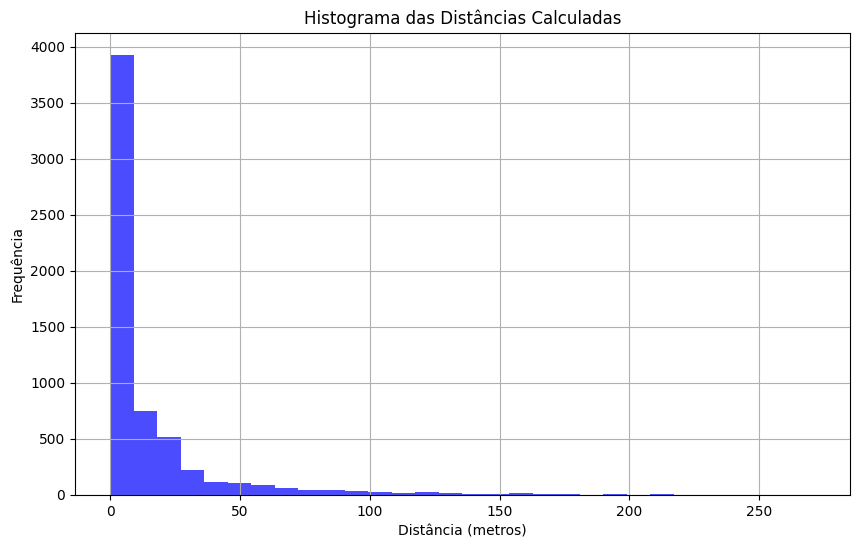

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='blue', alpha=0.7)
plt.title('Histograma das Distâncias Calculadas')
plt.xlabel('Distância (metros)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

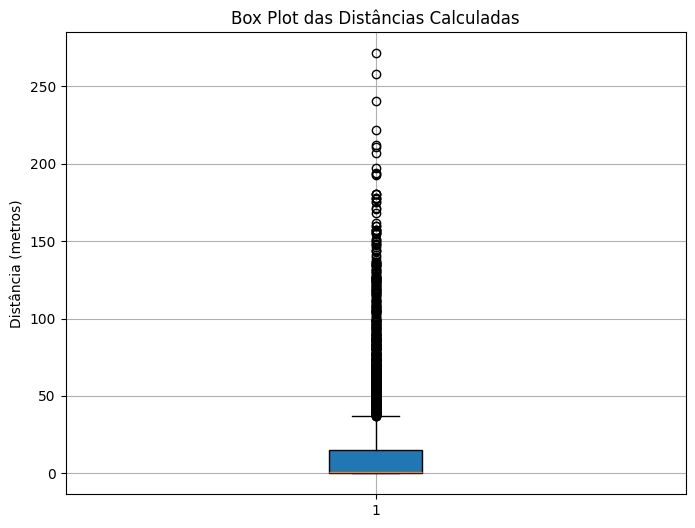

In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(distances, vert=True, patch_artist=True)
plt.title('Box Plot das Distâncias Calculadas')
plt.ylabel('Distância (metros)')
plt.grid(True)
plt.show()

# Visualização do mapa

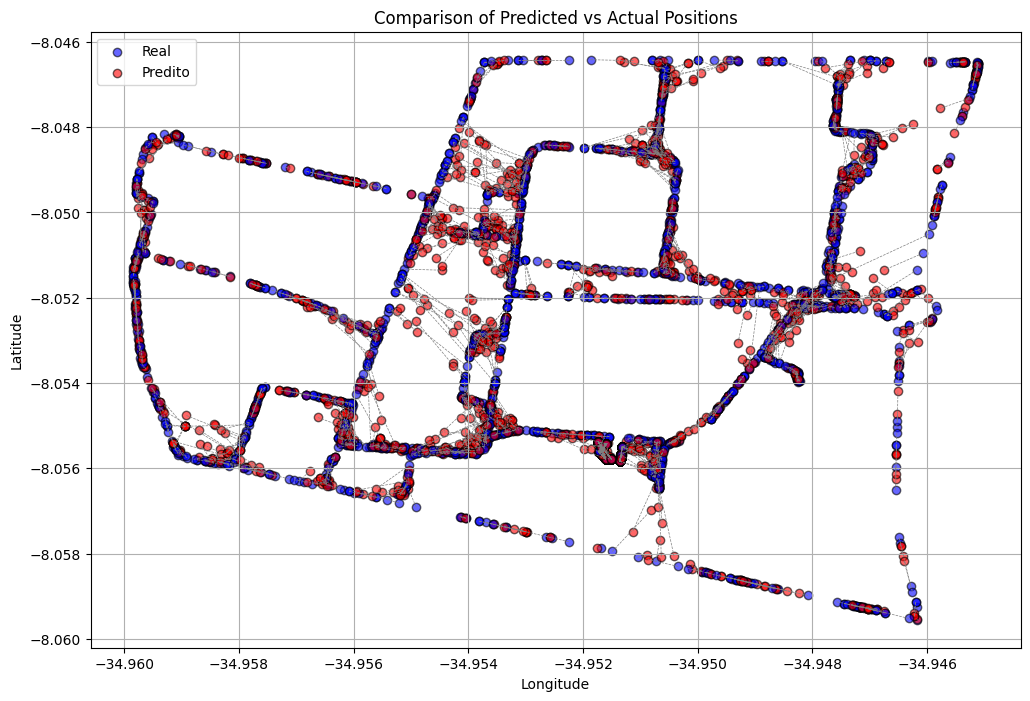

In [13]:
def plot_comparison_map(y_true, y_pred):
    # Configurar a figura e o eixo
    fig, ax = plt.subplots(figsize=(12, 8))

    # Desenhar cada par de pontos reais e preditos
    for real, pred in zip(y_true, y_pred):
        # Pontos reais em azul
        ax.scatter(real[1], real[0], color='blue', label='Real', alpha=0.6, edgecolor='black')
        # Pontos preditos em vermelho
        ax.scatter(pred[1], pred[0], color='red', label='Predito', alpha=0.6, edgecolor='black')
        # Linha entre real e predito
        ax.plot([real[1], pred[1]], [real[0], pred[0]], 'gray', linestyle='--', linewidth=0.5)

    # Configurações de exibição
    ax.set_title('Comparison of Predicted vs Actual Positions')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
    
    # Adicionar legendas apenas uma vez
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Mostrar o gráfico
    plt.show()

plot_comparison_map(y_val.values, predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


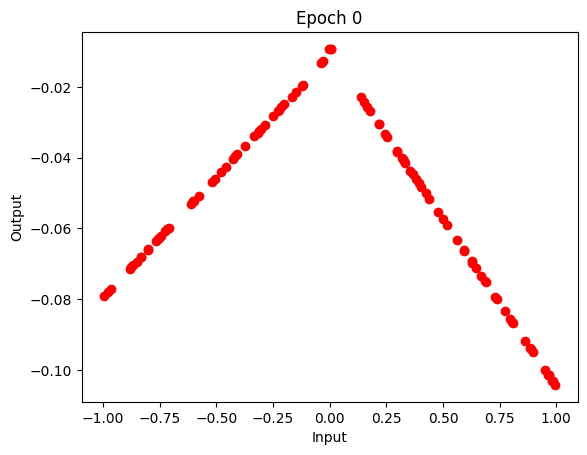

0 [D loss: 0.6718583106994629 | D accuracy: 75.0] [G loss: [array(0.6790061, dtype=float32), array(0.6790061, dtype=float32), array(0.5, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Definindo o gerador
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_dim=1, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    return model

# Definindo o discriminador
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_dim=1, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Compilando o discriminador
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compilando o gerador
generator = build_generator()

# Construindo o modelo GAN
z = layers.Input(shape=(1,))
generated_data = generator(z)
discriminator.trainable = False
validity = discriminator(generated_data)
combined = tf.keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer='adam')

# Função para gerar dados de regressão
def generate_real_data(n):
    X = np.random.rand(n, 1) * 2 - 1  # Dados de entrada entre -1 e 1
    y = 2 * X + 1  # Função linear y = 2x + 1
    return X, y

# Gerando dados reais
X_real, y_real = generate_real_data(1000)

# Hyperparameters
batch_size = 32
epochs = 1000
sample_interval = 100

# Arrays para guardar as perdas
d_losses = []
g_losses = []

# Função para salvar os dados gerados
def save_generated_data(epoch):
    noise = np.random.rand(100, 1) * 2 - 1
    generated_data = generator.predict(noise)
    plt.scatter(noise, generated_data, color='red')
    plt.title(f'Epoch {epoch}')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.show()

# Treinamento da GAN
for epoch in range(epochs):
    # Treinando o discriminador
    idx = np.random.randint(0, X_real.shape[0], batch_size)
    real_data = y_real[idx]
    noise = np.random.rand(batch_size, 1) * 2 - 1
    generated_data = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Treinando o gerador
    noise = np.random.rand(batch_size, 1) * 2 - 1
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Guardando as perdas
    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    # Salvando e mostrando os dados gerados a cada intervalo de amostra
    if epoch % sample_interval == 0:
        save_generated_data(epoch)
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

# Plotando as perdas
plt.figure(figsize=(10,5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('GAN Training Losses')
plt.show()